In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

pd.set_option('max_columns', None)
sns.set_theme(palette=sns.color_palette("Set2"), rc={'figure.figsize':(12,6)})

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold, RandomizedSearchCV, GridSearchCV

# EDA

In [3]:
action_train = pd.read_csv('../input/internshipsbertask/Task/action_train.csv', index_col=0)
action_test = pd.read_csv('../input/internshipsbertask/Task/action_test.csv', index_col=0)
person = pd.read_csv('../input/internshipsbertask/Task/person.csv', index_col=0)

print(action_train.shape)
print(action_test.shape)
print(person.shape)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2197291, 15)
(498687, 14)
(189118, 41)


In [4]:
action_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   person_id    object
 1   action_id    object
 2   date         object
 3   action_type  object
 4   char_1       object
 5   char_2       object
 6   char_3       object
 7   char_4       object
 8   char_5       object
 9   char_6       object
 10  char_7       object
 11  char_8       object
 12  char_9       object
 13  char_10      object
 14  result       int64 
dtypes: int64(1), object(14)
memory usage: 268.2+ MB


In [5]:
person.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null  bool  
 20  char

In [6]:
action_train.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [7]:
person.head()

,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [8]:
action_train[action_train.action_type == 'type 1'].head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,NaN,0
105,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,NaN,0
106,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,type 4,type 5,type 1,NaN,0
107,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,type 2,type 4,type 2,NaN,0
108,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,type 1,type 6,type 8,NaN,0


<AxesSubplot:xlabel='action_type', ylabel='result'>

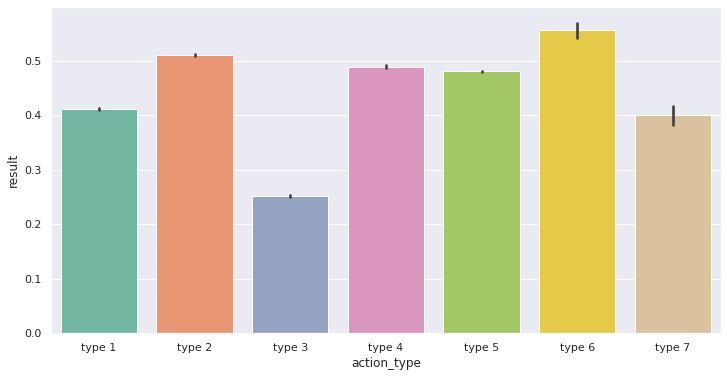

In [9]:
order = ['type ' + str(i) for i in range(1, 8)]
sns.barplot(data=action_train, y='result', x='action_type', order=order)

<AxesSubplot:xlabel='action_type', ylabel='count'>

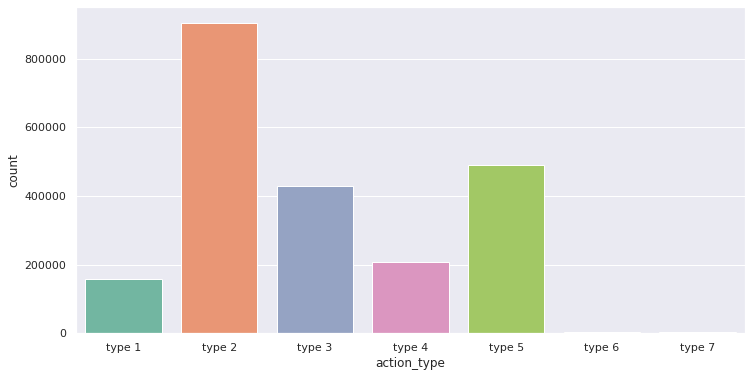

In [10]:
sns.countplot(data=action_train, x='action_type', order=order)

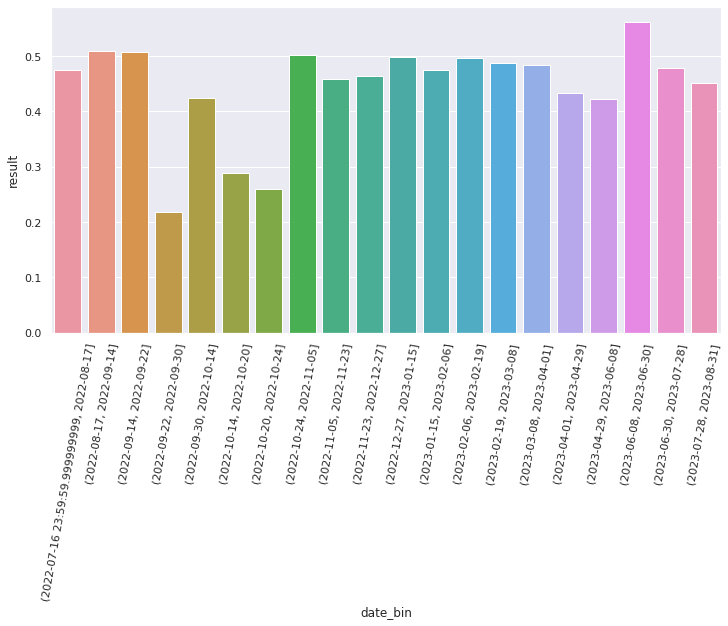

In [11]:
action_train['date'] = pd.to_datetime(action_train.date)
action_train['date_bin'] = pd.qcut(action_train['date'], q=20)
ax = sns.barplot(data=action_train, y='result', x='date_bin', ci=None)
ax.tick_params(axis='x', rotation=80)

# Filling missing values



In [12]:
def count_na(df):
  return df.isna().sum()[df.isna().sum() != 0]

In [13]:
def count_unique(df, min_freq):
    total = 0
    for col in df.columns:
        total += len(df[col].unique())
        if len(df[col].unique()) >= min_freq:
            print(col, len(df[col].unique()))
    print(f'total_unique = {total}')

In [14]:
train = action_train.join(person.set_index('person_id'), on='person_id', lsuffix='_action')
test = action_test.join(person.set_index('person_id'), on='person_id', lsuffix='_action')

In [15]:
count_na(train)

char_1_action     2039676
char_2_action     2039676
char_3_action     2039676
char_4_action     2039676
char_5_action     2039676
char_6_action     2039676
char_7_action     2039676
char_8_action     2039676
char_9_action     2039676
char_10_action     157615
dtype: int64

In [16]:
count_na(test)

char_1_action     458595
char_2_action     458595
char_3_action     458595
char_4_action     458595
char_5_action     458595
char_6_action     458595
char_7_action     458595
char_8_action     458595
char_9_action     458595
char_10_action     40092
dtype: int64

In [17]:
for i in range(1, 11):
  column = 'char_' + str(i) + '_action'
  train[column].fillna('type -1', inplace=True)
  test[column].fillna('type -1', inplace=True)

In [18]:
count_na(train)

Series([], dtype: int64)

In [19]:
count_unique(train, min_freq=3)

person_id 151295
action_id 2197291
date_action 411
action_type 7
char_1_action 52
char_2_action 33
char_3_action 12
char_4_action 8
char_5_action 8
char_6_action 6
char_7_action 9
char_8_action 19
char_9_action 20
char_10_action 6516
date_bin 20
group_1 29899
char_2 3
date 1196
char_3 43
char_4 25
char_5 9
char_6 7
char_7 25
char_8 8
char_9 9
char_38 101
total_unique = 2387092


In [20]:
count_unique(test, min_freq=3)

person_id 37823
action_id 498687
date_action 411
action_type 7
char_1_action 49
char_2_action 32
char_3_action 12
char_4_action 8
char_5_action 7
char_6_action 6
char_7_action 9
char_8_action 19
char_9_action 20
char_10_action 3962
group_1 11640
char_2 3
date 1176
char_3 41
char_4 25
char_5 9
char_6 7
char_7 25
char_8 8
char_9 9
char_38 101
total_unique = 554154


* Я собираюсь кодировать признаки с помощью One-Hot кодирования, так как в отсутствии дополнительной информации мы не можем предположить, что значения признаков являются упорядоченными.

* Так как char_10_action - очень важная характеристика (только ей обладают действия типа 2-7), мы соберём редкие характеристики в новый тип type_rare. Так же поступим для нескольких других признаков

* Group_1, как id с датами, мы удалим, потому что они обладают слишком большим количеством значений для кодирования. И, на первый взгляд, не представляют особой важности.

In [21]:
def unite_rares(train, test, column, limit):
    freqs = train[column].value_counts()
    rare_types = set([col_type for col_type in freqs.index if freqs[col_type] <= limit])

    train[column] = train[column].apply(lambda x: 'type_rare' if x in rare_types else x)
    test[column] = test[column].apply(lambda x: 'type_rare' if x in rare_types else x)
    del freqs, rare_types
    return train, test

In [22]:
(train.char_10_action.value_counts() <= 5000).sum()

6493

In [23]:
train, test = unite_rares(train, test, 'char_10_action', 5000)

In [24]:
(train.char_1_action.value_counts() <= 1000).sum()

32

In [25]:
train, test = unite_rares(train, test, 'char_1_action', 1000)

In [26]:
(train.char_2_action.value_counts() <= 1000).sum()

17

In [27]:
train, test = unite_rares(train, test, 'char_2_action', 1000)

In [28]:
(train.char_9_action.value_counts() <= 6000).sum()

8

In [29]:
train, test = unite_rares(train, test, 'char_9_action', 6000)

In [30]:
(train.char_3.value_counts() <= 10000).sum()

23

In [31]:
train, test = unite_rares(train, test,'char_3', 10000)

In [32]:
X_train = train.drop(['person_id', 'action_id', 'date_action', 'date', 'date_bin', 'group_1'], axis=1)

In [33]:
X_test = test.drop(['person_id', 'action_id', 'date_action', 'date', 'group_1'], axis=1)

In [34]:
count_unique(X_train, min_freq=3)

action_type 7
char_1_action 21
char_2_action 17
char_3_action 12
char_4_action 8
char_5_action 8
char_6_action 6
char_7_action 9
char_8_action 19
char_9_action 13
char_10_action 24
char_2 3
char_3 21
char_4 25
char_5 9
char_6 7
char_7 25
char_8 8
char_9 9
char_38 101
total_unique = 412


In [35]:
for i in range(10, 38):
    X_train['char_' + str(i)] = X_train['char_' + str(i)].astype(int)
    X_test['char_' + str(i)] = X_train['char_' + str(i)].astype(int)

In [36]:
y_train = X_train.result
X_train = pd.get_dummies(X_train.drop('result', axis=1), drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape)

(2197291, 262) (2197291,)
(498687, 715)


In [39]:
X_train.head()

,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,action_type_type 2,action_type_type 3,action_type_type 4,action_type_type 5,action_type_type 6,action_type_type 7,char_1_action_type 1,char_1_action_type 10,char_1_action_type 11,char_1_action_type 12,char_1_action_type 13,char_1_action_type 15,char_1_action_type 16,char_1_action_type 17,char_1_action_type 2,char_1_action_type 23,char_1_action_type 26,char_1_action_type 29,char_1_action_type 3,char_1_action_type 4,char_1_action_type 5,char_1_action_type 6,char_1_action_type 7,char_1_action_type 8,char_1_action_type 9,char_1_action_type_rare,char_2_action_type 1,char_2_action_type 10,char_2_action_type 12,char_2_action_type 13,char_2_action_type 14,char_2_action_type 16,char_2_action_type 17,char_2_action_type 19,char_2_action_type 2,char_2_action_type 3,char_2_action_type 5,char_2_action_type 6,char_2_action_type 7,char_2_action_type 8,char_2_action_type 9,char_2_action_type_rare,char_3_action_type 1,char_3_action_type 10,char_3_action_type 11,char_3_action_type 2,char_3_action_type 3,char_3_action_type 4,char_3_action_type 5,char_3_action_type 6,char_3_action_type 7,char_3_action_type 8,char_3_action_type 9,char_4_action_type 1,char_4_action_type 2,char_4_action_type 3,char_4_action_type 4,char_4_action_type 5,char_4_action_type 6,char_4_action_type 7,char_5_action_type 1,char_5_action_type 2,char_5_action_type 3,char_5_action_type 4,char_5_action_type 5,char_5_action_type 6,char_5_action_type 7,char_6_action_type 1,char_6_action_type 2,char_6_action_type 3,char_6_action_type 4,char_6_action_type 5,char_7_action_type 1,char_7_action_type 2,char_7_action_type 3,char_7_action_type 4,char_7_action_type 5,char_7_action_type 6,char_7_action_type 7,char_7_action_type 8,char_8_action_type 1,char_8_action_type 10,char_8_action_type 11,char_8_action_type 12,char_8_action_type 13,char_8_action_type 14,char_8_action_type 15,char_8_action_type 16,char_8_action_type 17,char_8_action_type 18,char_8_action_type 2,char_8_action_type 3,char_8_action_type 4,char_8_action_type 5,char_8_action_type 6,char_8_action_type 7,char_8_action_type 8,char_8_action_type 9,char_9_action_type 1,char_9_action_type 10,char_9_action_type 12,char_9_action_type 15,char_9_action_type 17,char_9_action_type 2,char_9_action_type 4,char_9_action_type 5,char_9_action_type 6,char_9_action_type 7,char_9_action_type 8,char_9_action_type_rare,char_10_action_type 1,char_10_action_type 2,char_10_action_type 201,char_10_action_type 23,char_10_action_type 248,char_10_action_type 257,char_10_action_type 297,char_10_action_type 3,char_10_action_type 400,char_10_action_type 420,char_10_action_type 433,char_10_action_type 450,char_10_action_type 452,char_10_action_type 464,char_10_action_type 481,char_10_action_type 489,char_10_action_type 52,char_10_action_type 55,char_10_action_type 61,char_10_action_type 649,char_10_action_type 8,char_10_action_type 899,char_10_action_type_rare,char_1_type 2,char_2_type 2,char_2_type 3,char_3_type 10,char_3_type 11,char_3_type 12,char_3_type 15,char_3_type 17,char_3_type 18,char_3_type 19,char_3_type 2,char_3_type 20,char_3_type 21,char_3_type 24,char_3_type 3,char_3_type 4,char_3_type 40,char_3_type 5,char_3_type 6,char_3_type 7,char_3_type 8,char_3_type 9,char_3_type_rare,char_4_type 10,char_4_type 11,char_4_type 12,char_4_type 13,char_4_type 14,char_4_type 15,char_4_type 16,char_4_type 17,char_4_type 18,char_4_type 19,char_4_type 2,char_4_type 20,char_4_type 21,char_4_type 22,char_4_type 23,char_4_type 24,char_4_type 25,char_4_type 3,char_4_type 4,char_4_type 5,char_4_type 6,char_4_type 7,char_4_type 8,char_4_type 9,char_5_type 2,char_5_type 3,char_5_type 4,char_5_type 5,char_5_type 6,char_5_type 7,char_5_type 8,char_5_type 9,char_6_type 2,char_6_type 3,char_6_type 4,char_6_type 5,char_6_type 6,char_6_type 7,cha

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Columns: 262 entries, char_10 to char_9_type 9
dtypes: int64(29), uint8(233)
memory usage: 1.0 GB


# Dimensionality reduction

Поскольку для такого большого датасета мне не хватит оперативки, я сожму его до разумных размеров

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_embedded = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
X_test_embedded = pca.fit_transform(X_test)
print(pca.explained_variance_ratio_)

[9.91468753e-01 2.06222159e-03 5.79410997e-04 4.68083439e-04
 2.66823581e-04 2.58507178e-04 2.31953989e-04 2.23065454e-04
 2.00131965e-04 1.86874678e-04]
[9.90212238e-01 2.69955178e-03 5.92107703e-04 5.40662032e-04
 3.31692491e-04 2.74885007e-04 2.36815506e-04 2.21926463e-04
 2.12472147e-04 2.03464022e-04]


In [43]:
del train, test, action_train, action_test, person, pca

# Training

In [44]:
def add_stats(df, clf, X, y, name):
    cv_results = cross_validate(clf, X, y, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
    
    acc = np.mean(cv_results["test_accuracy"]).round(4)
    prec = np.mean(cv_results["test_precision"]).round(4)
    rec = np.mean(cv_results["test_recall"]).round(4)
    f1 = np.mean(cv_results["test_f1"]).round(4)
    roc_auc = np.mean(cv_results["test_roc_auc"]).round(4)
    df[name] = [acc, prec, rec, f1, roc_auc]
    return df

In [45]:
from tqdm.notebook import tqdm
classifiers = [RandomForestClassifier(), LogisticRegression(solver='liblinear'), GradientBoostingClassifier()]

names = ['RandomForest','LogisticRegression', 'GradientBoosting']

model_compar_base = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

for clf, clf_name in tqdm(zip(classifiers, names)):
    model_compar_base = add_stats(model_compar_base, clf, X_train_embedded, y_train,clf_name)
    del clf

0it [00:00, ?it/s]

Cравним несколько моделей

<AxesSubplot:xlabel='AUC'>

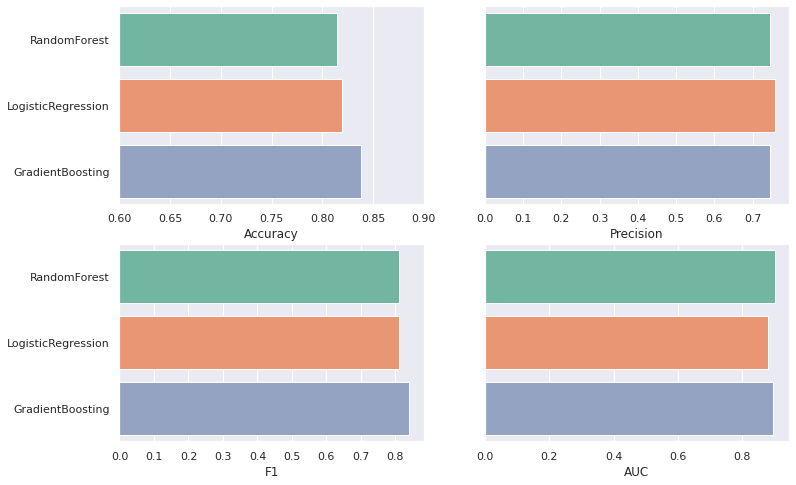

In [47]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 8))
sns.barplot(data=model_compar_base.T, y=model_compar_base.columns.values, x='Accuracy', orient='horizont', ax=axes[0][0])
axes[0][0].set_xlim(0.6, 0.9)
sns.barplot(data=model_compar_base.T, y=model_compar_base.columns.values, x='Precision', orient='horizont', ax=axes[0][1])
sns.barplot(data=model_compar_base.T, y=model_compar_base.columns.values, x='F1', orient='horizont', ax=axes[1][0])
sns.barplot(data=model_compar_base.T, y=model_compar_base.columns.values, x='AUC', orient='horizont', ax=axes[1][1])

Также стоило бы подтюнить лучшую модель с помощью следующего кода (на примере RandomForest):

In [ ]:
model_compar = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

TRAIN = False
if TRAIN:
    param_grid = { 
        'n_estimators': [100, 300, 500, 700, 1000],
        'max_features': ['auto', 'log2'],
        'max_depth': [5, 7, 9, 11, 13, 15],
        'criterion': ['gini', 'entropy'],
        'bootstrap': [True, False],
    }

    model = RandomForestClassifier()
    rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1,
                              scoring='accuracy', refit=True, verbose=10)
    rscv.fit(X_train, y_train)

    rf_params = rscv.best_params_
    print(rscv.best_params_)
    print(rscv.best_score_)

    model_compar = add_stats(model_compar, rscv.best_estimator_, X_train, y_train, 'RandomForrest')

Но, даже со сжатым датасетом модели обучаются достаточно долго, чтобы обучать их десятки раз. Поэтому я решил взять модель из коробки. Всё-таки это не соревнование, и тут не стоит гнаться за процентами прироста.

In [52]:
gb = GradientBoostingClassifier()
gb.fit(X_train_embedded, y_train)
y_pred = gb.predict(X_test_embedded)

In [53]:
output = pd.DataFrame({'result': y_pred})
output.to_csv('submission.csv', index=False)